In [2]:
import numpy as np
from pathlib import Path
import os
import re
import h5py
import pandas as pd
import logging
import pickle

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

from graspy.plot import pairplot, heatmap
from lol import LOL
from hyppo.independence import Dcorr
from hyppo.ksample._utils import k_sample_transform
from scipy.stats import multiscale_graphcorr, ttest_rel, ttest_ind
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances

from nilearn import datasets, plotting
import nibabel as nib
import matplotlib as mpl

import sys; sys.path.append('../')
from src.tools import get_files, get_latents, align

%load_ext autoreload
%autoreload 2

/home/rflperry/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
datadir = Path("/mnt/ssd3/ronan/data")
unaligned_dmap_dir = datadir / f"dmap_09-04_unaligned"
aligned_dmap_dir = datadir / f"dmap_09-22_aligned"
aligned_normed_dmap_dir = datadir / f"dmap_09-23_aligned_normed"
external_dir = Path('../data/external')

## Aligned null dists and test stat

### Gradient 1 (of 0,1,2)

In [4]:
with open('../data/2sample_tests/DCORR_dmap_2-sample_aligned_results_dict_2000.pkl', 'rb') as handle:
    data_dict = pickle.load(handle)

In [5]:
gradient = 0

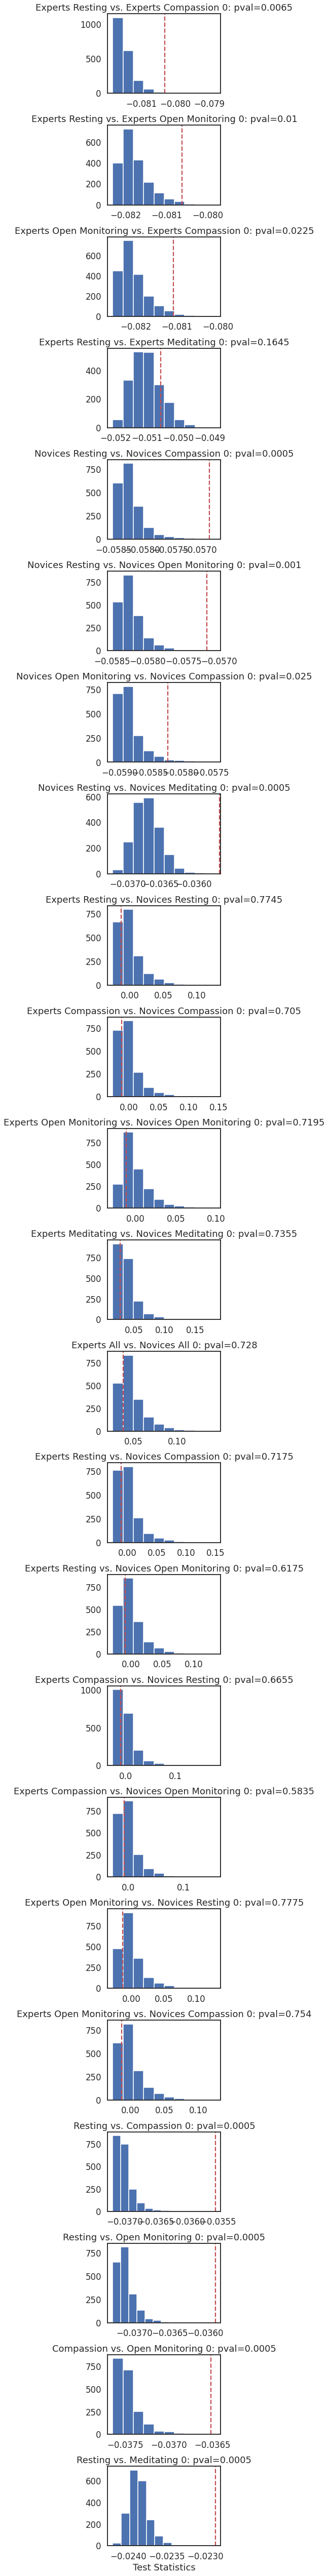

In [13]:
fig, axes = plt.subplots(len(data_dict.keys()),1,sharex=False, figsize=(4, 4*len(data_dict.keys())))
for ax,test in zip(axes, data_dict.keys()):
    ax.hist(data_dict[test][gradient]['null_dist'])
    ax.set_title(f'{test} {gradient}: pval={data_dict[test][gradient]["pvalue"]}')
    ax.axvline(data_dict[test][gradient]['test_stat'], c='r', ls='--')
# for ax in axes[:-2]:
#     ax.set_xticks([])
fig.subplots_adjust(hspace=0.4)
axes[-1].set_xlabel('Test Statistics')
plt.show()